In [4]:
# Importing basic functions
import pandas as pd
#import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro# Importing basic functions
import pandas as pd
#import missingno as mano
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math as mt 
import statistics as st
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
import matplotlib
from matplotlib.pyplot import figure
# Importinf Clasification Regression Related Functions
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve 
from sklearn import metrics
import xgboost as xgb
# This function read data from excel and csv files to dataframe.
# Input Arguments file: File name with path (Eg: 'D:/data/dataread.csv'), f_type: File Type (Eg: 'csv',default csv)
def file_todataframe(file,f_type):
    if f_type == 'csv':  
        return pd.read_csv(file)
    elif f_type == 'excel': 
        return pd.read_excel(file)
    elif f_type == 'json': 
        return pd.read_json(file)
    
# This function display shape, data type, data near head and tail of given data fram.
# Input Arguments df: dataframe, n: No f data points to display
def df_details(d_f,n):
    print('Data Types of Column: \n',d_f.dtypes)
    print('\n Size of Datarame: ',d_f.shape)
    print('\n Top and bottom ',n,' rows: \n')
    display(d_f.head(n).append(d_f.tail(n)))

# This function drops irrelevant columns
# Input Arguments df: dataframe, col_del: Value or index array of column to delete (Eg: [1,3,5] or ['Names',Sales]), 
# typ: 1 for column index and 0 for column name in col_del
def col_drop(d_f,col_del,typ=0):
    if typ == 0:
        d_f = d_f.drop(col_del,axis=1)
    elif typ == 1:
        d_f = d_f.drop(df.columns[col_del],axis=1)
    return d_f

# This function drops rows with particular column values
# Input Arguments df: dataframe, row_del: Delete if row with given value,
# col_ref: Name of column to check for row values (Eg:['Names']), 
def row_drop(d_f,row_del,col_ref):
    d_f = d_f.drop(d_f[d_f[col_ref] == row_del].index)
    return d_f

# This function give deatials for missing values in data
# Input Arguments df: dataframe
def miss_ch(d_f):
    print('Available data with no nulls: ', d_f.dropna().shape[0])
    display('Deatils of Null values column wise',d_f.isnull().sum())
    
# This function give deatials for missing values in data
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# graph: Types of graph to display. (Eg: ['bar','matrix','heatmap','dendrogram'],['all'] default 'all')
def miss_viz(d_f,col_int = 'all',graph = 'all'):
    import missingno as mano
    av_gp = ['bar','matrix','heatmap','dendrogram']
    col_nam = d_f.columns
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    if graph == 'all':
        graph = av_gp
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'bar','matrix','heatmap','dendrogram'")
        return
    
    for gp in graph:
        getattr(mano, gp)(d_f[col_int])

# This function fill missing values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# metd: Types of graph to display. (Option: {0(float),‘backfill’, ‘bfill’, ‘pad’, ‘ffill’, 'linear'} default None)
def fill_miss(d_f,col_int = 'all',metd = None):
    col_nam = d_f.columns
    av_method = ['backfill', 'bfill', 'pad', 'ffill', 'linear']
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    
    if metd == None:
        return d_f
    elif (type(metd) == int) | (type(metd) == float):
        print('yes')
        return d_f[col_int].fillna(metd)  
    elif metd == 'linear':
        return d_f[col_int].interpolate(method = 'linear') 
    elif  metd in av_method:
        return d_f[col_int].fillna(method = 'ffill')
    else:
        print("Invalid fill type")
        return d_f

# Function for Numerical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# func: Types of graph and function. (Option: {'distplot','boxpot','scatterplot','describe','normality'} default all)
def data_num(d_f,col_int = 'all',func = 'all',scat = None):
    from scipy.stats import shapiro
    from statsmodels.graphics.gofplots import qqplot
    av_func = ['hist','boxplot','scatter','describe','normality']
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    #Checking Parameter available function
    if func == 'all':
        func = av_func
    elif not all(i in av_gp for i in graph):
        print("Invalid Graph type, select 'distplot','boxpot','scatterplot','describe','normality'")
        return
    if scat is None:
        scat = d_f.columns[0]
    
    
    for fn in func:
        if fn == 'describe':
            display("Statictical Details",d_f[col_int].describe())
        else:
            for col in col_int:
                if fn == 'normality':
                    #qqplot(df[col])
                    print("Normality Test for: ",col)
                    stat, p = shapiro(d_f[col])
                    if p > 0.05:
                        print('Sample looks Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                    else:
                        print('Sample does not look Gaussian. Statistics=%.3f, p=%.3f'% (stat, p))
                elif fn == 'scatter':
                    display(col)
                    plt.scatter(d_f[col],d_f[scat])  
                    plt.show()
                else:
                    display(col)
                    getattr(plt, fn)(d_f[col])   
                    plt.show()
                    
# Function for Categorical Data Analysis
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all')
def data_cat(d_f,col_int = 'all',bar = None):
    import matplotlib.pyplot as plt
    col_nam = d_f.select_dtypes(include=['object','category']).columns
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_num = d_f.select_dtypes(include=numerics).columns   
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 

    if not ((bar in col_num) | (bar is None)):
        print("Only numeric column for Bar")
        return 
    if not (bar is None):
        for col in col_int:
            plt.figure(figsize=(8,5))
            plt.bar(d_f[col], d_f[bar])
            plt.show()
        return
    for col in col_int:
        plt.suptitle(col)
        d_f[col].value_counts().plot(kind='bar')
        plt.show()

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# dtyp: New data types of coloumn default int
def col_dtype(d_f,col_int,dtyp = int):
    d_f = deep_copy(d_f)
    av_fun = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64','int','float','str','category']
    col_nam = d_f.columns
    #Checking Parameter Column names
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    #Checking Parameter available function
    if not dtyp in av_fun:
        print("Invalid data type")
        return d_f
    
    d_f[col_int] = d_f[col_int].astype(dtyp,errors='ignore')
    return d_f

# Function for Canging column type
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val = [old value, new value]
def col_opre(d_f,col_int,opr = None,val = None):
    col_nam = d_f.select_dtypes(include=['object']).columns
    av_opr = ['str_replace','rm_space','chg_value']
    
    #Checking Parameter Column names
    if not (col_int in col_nam):
        print("Invalid column name")
        return d_f

    if opr == 'str_replace':
        d_f[col_int] = d_f[col_int].str.replace(val[0], val[1])
        return d_f
    elif opr == 'rm_space':
        d_f[col_int] = d_f[col_int].str.replace(' ', '')
        return d_f
    elif opr == 'chg_value':
        d_f[col_int] = d_f[col_int].replace(val[0], val[1])
        return d_f
    else:
        print("Invalid Opeation")
        return d_f
    
# Function for Performing numerical operations to column values
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'), 
# opr: Operation to be performed on coloumn values, val: value to apply on column
def col_opre(d_f,col_int = 'all',opr = None,val = None):
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns  


    if opr == 'add':
        d_f[col_int] = d_f[col_int]+val
        return d_f
    elif opr == 'sub':
        d_f[col_int] = d_f[col_int]-val
        return d_f
    elif opr == 'mul':
        d_f[col_int] = d_f[col_int]*val
        return d_f
    elif opr == 'div':
        d_f[col_int] = d_f[col_int]/val
        return d_f
    else:
        print("Invalid Opeation")
        return d_f

# Function for creating a deep copy
# Input Arguments df: dataframe, Output data frame copy
def deep_copy(d_f):
    return d_f.copy(deep=True)

# Function for coding Categorical variable  to Numeric
# Input Arguments df: dataframe, col_int: Columns of intrest (Eg: ['Sale','Customer'],['all'] default 'all'{must be string}), 
# coding_type: Coding type to apply{'label','binary','ordinal','onehot'} default,label, contain: For binary
def cat_num(d_f,col_int,coding_type = 'label',contain=None,X = None):
    from sklearn.preprocessing import OrdinalEncoder
    from sklearn.preprocessing import OneHotEncoder
    d_f = deep_copy(d_f)
    col_nam = d_f.select_dtypes(include=['object']).columns
    if not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return d_f
    else: 
        d_f[col_int] =  d_f[col_int].astype('str')
        
    if coding_type == 'label':
        for col in col_int:
            d_f[col] = d_f[col].astype('category')
            d_f[col] = d_f[col].cat.codes
        return d_f
    elif coding_type == 'binary':
        for col in col_int:
            d_f[col] = np.where(d_f[col].str.contains(contain), 1, 0)
        return d_f
    elif coding_type == 'ordinal':
        for col in col_int:
            ord_enc = OrdinalEncoder()
            d_f[col] = ord_enc.fit_transform(d_f[[col]])
        return d_f
    elif coding_type == 'onehot':
        for col in col_int:
            temp = pd.get_dummies(d_f[col], prefix=col)
            d_f = d_f.join(temp)
            d_f = col_drop(d_f,col)
        return d_f
    else:
        display("Invalid Ending Method")
        return d_f
    
# This function scatter Plot
# Input Arguments df: dataframe, col_int: Two columns of intrest (Eg: ['Sale','Customer'],['all']), 
def scatter_plot(d_f,col_int = None):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    col_nam = d_f.select_dtypes(include=numerics).columns
    if (col_int is None) & (not all(i in col_nam for i in col_int)) & (len(col_int) != 2):
        print("Invalid column name")
        return 
    x = d_f[col_int[0]]
    y = d_f[col_int[1]]
    xv = col_int[0]+' X- Value'
    yv = col_int[1]+' Y- Value'
    tit = col_int[0] + ' vs ' + col_int[1] +' Scatter plot'

    plt.scatter(x, y)
    plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
    plt.title(tit)
    plt.xlabel(xv)
    plt.ylabel(yv)
    plt.show()

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def anova(d_f,col_int='all',col_main=None):
    from scipy import stats
    import statsmodels.api as sm
    from statsmodels.formula.api import ols
    
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64',]
    col_num = d_f.select_dtypes(include=numerics).columns 
    
    #Checking Parameter Column names
    if col_int == 'all':
        col_int = col_nam
    elif not all(i in col_nam for i in col_int):
        print("Invalid column name")
        return 
    
    for col in col_int:
        model = ols(col_main+'~ C(Q("'+col+'"))', data=d_f).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        print ("\nAnova =>",col_main," - ",col)
        display(anova_table)

## T Test
def t_test(d_f,col_ind=[1,2]):
    data1 = d_f.iloc[:,col_ind[0]].values
    data2 = d_f.iloc[:,col_ind[1]].values
    # calculate means
    mean1, mean2 = st.mean(data1), st.mean(data2)
    # calculate sample standard deviations
    std1, std2 = st.stdev(data1), st.stdev(data2)
    # calculate standard errors
    n1, n2 = len(data1), len(data2)
    se1, se2 = std1/mt.sqrt(n1), std2/mt.sqrt(n2)
    # standard error on the difference between the samples
    sed = mt.sqrt(se1**2.0 + se2**2.0)
    # calculate the t statistic
    t_stat = (mean1 - mean2) / sed
    print('T Test Statistics=%.3f' % (t_stat))

## Normality Test
def norm(d_f,col_ind=[1]):
    for col in col_ind:
        data = d_f.iloc[:,col]
        stat, p = shapiro(data)
        print('Statistics=%.3f, p=%.3f' % (stat, p))
        # interpret
        alpha = 0.05
        if p > alpha:
            print('Sample looks Gaussian (fail to reject H0)')
        else:
            print('Sample does not look Gaussian (reject H0)')
        data.hist()
        
# This function Correlation Heat Map
# Input Arguments d_f: dataframe
def corr_hmap(d_f):
    import seaborn as sns
    sns.set(rc={'figure.figsize':(15,8)})
    corr = d_f.corr().dropna(1,'all').dropna(0,'all')
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=90,
        horizontalalignment='right'
    );
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=0,
        horizontalalignment='right'
    );    

# Function for applyng Machine learning Models
# Input Arguments df with last raw as labels, task: regression or classification, algo: Descion Tree or Random Forest
def ml_algo(X_train, X_test, y_train, y_test,algo = 'decisiontree',task = 'Reg',n=3):

    #X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
    if task == 'Reg':
        if algo == 'decisiontree':
            model = DecisionTreeRegressor(max_depth=n)

        elif algo == 'randomforest':
            model = RandomForestRegressor(n_estimators = n, random_state = 42)
            
        elif algo == 'knn':
            model = KNeighborsRegressor(n_neighbors=n)
            
        elif algo == 'lreg':
            model = LinearRegression()
            
        elif algo == 'svm':
            model = SVR(kernel="rbf")
            
        elif algo == 'gboost':
            model = GradientBoostingRegressor()
            
        elif algo == 'adaboost':
            model = AdaBoostRegressor(random_state=0, n_estimators=100)
            
        else:
            print("Invalid Algorithm")
            return  
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r_2 = r2_score(y_test, y_pred)
        r_2adj = r2_score(y_test, y_pred,multioutput='variance_weighted')
        return mae,mse,r_2,r_2adj,model
        
    elif task == 'Class':    
        if algo == 'decisiontree':
            model = DecisionTreeClassifier(max_depth=n) 
        
        elif algo == 'randomforest':
            model=RandomForestClassifier(n_estimators=n)
            
        elif algo == 'knn':
            model = KNeighborsClassifier(n_neighbors=n)
            
        elif algo == 'gboost':
            model = GradientBoostingClassifier()
            
        elif algo == 'adaboost':
            model = AdaBoostClassifier(n_estimators=100, random_state=0)
            
        elif algo == 'svc':
            model = svm.SVC()
            
        elif algo == 'naive':
            model = GaussianNB()
            
        elif algo == 'xgboost':
            model = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
            
        elif algo == 'mlp':
            model = MLPClassifier(hidden_layer_sizes=5)
            
        elif algo == 'logit':
            model = LogisticRegression()            
        else:
            print("Invalid Algorithm")
            return
        

        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        c_m =confusion_matrix(y_test, y_pred)
        c_r = classification_report(y_test, y_pred)
        acc_sc = accuracy_score(y_test, y_pred)

        fpr , tpr, _ = roc_curve(y_test, y_pred)
        auc_roc = metrics.auc(fpr, tpr)
        
        logloss = log_loss(y_test, y_pred)       
        #Precision
        pre_l = precision_score(y_test, y_pred)*100
        #Recall
        recall_l = recall_score(y_test, y_pred)*100
        return c_m,c_r,acc_sc,auc_roc,logloss,model,pre_l,recall_l
    
# Data frame with output variable at first location
# f_s features to select
def feature_selectk(d_f,f_s,col):
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import f_classif
    from sklearn.model_selection import train_test_split

    x = col_drop(d_f,col,typ=0)
    y = d_f[col]
    fs = SelectKBest(score_func=f_classif, k=f_s)
    # learn relationship from training data
    fs.fit(x, y)
    # transform train input data
    x_fs = fs.transform(x)
    return x_fs,y,fs

def feature_select_rffs(x,y,reg=True):
    from sklearn.feature_selection import SelectFromModel
    if reg:
        sel = SelectFromModel(RandomForestRegressor(n_estimators = 50))
    else:
        sel = SelectFromModel(RandomForestClassifier(n_estimators = 50))
    sel.fit(x, y)
    selected_feat= x.columns[(sel.get_support())]
    return selected_feat

def importantfeat_rffs(d_f,reg=True): 
    # random forest for feature importance on a regression problem
    from sklearn.datasets import make_regression
    from sklearn.ensemble import RandomForestRegressor
    from matplotlib import pyplot
    # define dataset
    X = d_f.iloc[:,1:len(d_f.columns)]
    y = d_f.iloc[:,:1]
    # define the model
    model = RandomForestRegressor()
    # fit the model
    model.fit(X, y)
    # get importance
    importance = model.feature_importances_
    # summarize feature importance
    for i,v in enumerate(importance):
        print('Feature: %0d, Score: %.5f' % (i,v))
    # plot feature importance
    pyplot.bar([x for x in range(len(importance))], importance)
    pyplot.xticks(range(1,len(importance)),df.iloc[:,1:len(df)-1].columns,rotation=90)
    pyplot.show()
    
# kfoldtype = KFold , StratifiedKFold
def ml_algo_cv(X,y,algo = 'decisiontree',task = 'Reg',n=3,split=10,kftype ='skfold'):
    accf = 0
    aucf = 0
    pref = 0
    recallf = 0
    i= 0
    if kftype == 'skfold':
        kf = StratifiedKFold(n_splits=split, random_state=None, shuffle=False)
    elif kftype == 'kfold':
        kf = KFold(n_splits=split, random_state=None, shuffle=False)
        
    for train_index, test_index in kf.split(X,y):
        trainX, testX = X.iloc[train_index], X.iloc[test_index] 
        trainY, testY = y.iloc[train_index], y.iloc[test_index]
        cm,cr,acc,auc,ll,mdl,pre,recall = ml_algo(trainX, testX, trainY, testY,algo = algo ,task = task,n=3)
        accf = accf + acc
        aucf = aucf + auc
        pref = pref + pre
        recallf = recallf + recall 
        i = i + 1
    accf = accf/i
    aucf = auc/i
    pref = pref/i
    recallf = recallf/i
    return accf,aucf,pref,recallf,cm

## Upsampling minority class and down sampling majority class 
def class_imbalance(d_f,resmpl=0.75,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
    resmplc = mt.ceil(mt.ceil(df[col].value_counts()[minor]* 0.75) * resmpl)
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=resmplc,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=resmplc,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp
## Upsampling minority class and down sampling majority class 
def class_imbalance_no(d_f,minr,maj,minor=0,col=None):
    df_majority = row_drop(df,minor+1,col[0])
    df_minority = row_drop(df,minor,col[0])
  
     
    # Upsample minority class
    df_minority_upsampled = resample(df_minority, 
                                     replace=True,     # sample with replacement
                                     n_samples=minr,    # to match majority class
                                     random_state=123) # reproducible results
    df_majority_under = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=maj,    # to match majority class
                                 random_state=123) # reproducible results
    # Combine majority class with upsampled minority class
    df_smp = pd.concat([df_majority_under, df_minority_upsampled])
    # Display new class counts
    #print(df_smp[col].value_counts())
    return df_smp

def con_mat(con_mat,lab = ['x-label','y-label']):
    import seaborn as sns
    import matplotlib.pyplot as plt   
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", ax = ax,cmap="YlGnBu"); #annot=True to annotate cells

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels([lab[0],lab[1]]); ax.yaxis.set_ticklabels([lab[0],lab[1]]);

# FS: Feature Selection
# CV: Cross Validiation
# CI: CLass Imbalance
def ml_com(d_f,colum,algor='decisiontree',fs=True,cv=True,ci=True,resmpl = 0.75):
    x = col_drop(d_f,colum,typ=0)
    y = d_f[colum]
    if fs & cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(df_samp,colum,typ=0)
        x = x[fet]
        y = df_samp[colum]
        acc,auc,pre,recall,cm = ml_algo_cv(x,y,algo = algor,task = 'Class',n=3,split=10,kftype ='skfold')
        
    elif fs & ~cv & ~ci:
        fet = feature_select_rffs(x,y,reg=False)
        x = col_drop(d_f,colum,typ=0)
        x = x[fet]
        y = d_f[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ci:
        df_samp = class_imbalance(d_f,resmpl = resmpl,minor=0,col=colum)
        x = col_drop(df_samp,colum,typ=0)
        y = df_samp[colum]
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)
    elif ~fs & ~cv & ~ci:
        X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=1)
        cm,cr,acc,auc,ll,model,pre,recall = ml_algo(X_train, X_test, y_train, y_test,algo = algor,task = 'Class',n=3)

    return acc,auc,pre,recall,cm

# Project Part#1 

# Using Google Trends and Mobility data for Nowcasting Quaterley GDP

## Wrangling through data

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Loading trends data
gt =  file_todataframe('Google Trend & Mobility Data.xlsx','excel')

In [7]:
df_details(gt,5)

Data Types of Column: 
 date                datetime64[ns]
Economic crisis              int64
Crisis                       int64
Recession                    int64
Financial crisis             int64
Inflation                    int64
Unemployment                 int64
BISP                         int64
ehsaas program               int64
USAID                        int64
Credit                       int64
Loan                         int64
Interest                     int64
House Loan                   int64
Car Loan                     int64
Food                         int64
Cinema                       int64
Cars                         int64
Birthday                     int64
Travel                       int64
Weddings                     int64
Fitness                      int64
Cigarette                    int64
Tourism                      int64
Hotels                       int64
Fast Food                    int64
House for sale               int64
Construction                 in

,date,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,USAID,...,subsidy,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI
0,2007-01-01,0,25,0,0,0,2,0,0,2,...,0,0,58,0,8,15,111.770772,1.143608e+06,7.517046e+05,42.189174
1,2007-02-01,6,24,0,0,12,5,0,0,7,...,0,4,56,0,7,30,118.117125,1.156167e+06,7.957577e+05,42.625995
2,2007-03-01,0,16,0,0,10,2,0,0,6,...,0,0,94,3,6,26,124.847885,1.151961e+06,8.342304e+05,42.835430
3,2007-04-01,0,11,0,0,11,15,0,0,2,...,3,0,76,7,13,23,113.019093,1.167843e+06,8.833794e+05,42.970067
4,2007-05-01,0,14,0,0,32,9,0,0,9,...,2,3,57,3,11,23,113.140877,1.197850e+06,8.927909e+05,43.365002
166,2020-11-01,0,7,2,1,10,2,2,6,0,...,2,2,21,3,7,11,147.320000,7.536188e+06,1.343438e+07,140.160000
167,2020-12-01,1,10,2,0,9,3,3,18,0,...,1,3,24,5,7,12,167.210000,7.691564e+06,1.402200e+07,139.670000
168,2021-01-01,1,10,1,0,8,2,2,10,0,...,1,2,23,7,7,11,175.490000,7.756899e+06,1.400587e+07,139.450000
169,2021-02-01,0,9,1,0,7,2,4,9,0,...,1,3,22,5,7,11,168.210000,7.870688e+06,1.426134e+07,142.610000
170,2021-03-01,1,9,1,0,7,2,1,11,0,...,1,2,22,3,7,11,146.837167,7.889423e+06,1.452507e+07,142.990000


In [8]:
# Loading Quaterly GDP Data
qgdp = file_todataframe('GDP_Q.xlsx','excel')

In [9]:
df_details(qgdp,5)

Data Types of Column: 
 Date    datetime64[ns]
GDPQ           float64
dtype: object

 Size of Datarame:  (84, 2)

 Top and bottom  5  rows: 



,Date,GDPQ
0,2000-03-01,1379.900000
1,2000-06-01,1418.500000
2,2000-09-01,1430.000000
3,2000-12-01,1426.200000
4,2001-03-01,1415.800000
79,2019-12-01,3189.820283
80,2020-03-01,3080.249332
81,2020-06-01,3114.324411
82,2020-09-01,3154.097321
83,2020-12-01,3177.588749


In [10]:
# Checking for missing values
miss_ch(qgdp)

Available data with no nulls:  84


'Deatils of Null values column wise'

Date    0
GDPQ    0
dtype: int64

In [11]:
# Checking for missing values in trends data
miss_ch(gt)

Available data with no nulls:  171


'Deatils of Null values column wise'

date                0
Economic crisis     0
Crisis              0
Recession           0
Financial crisis    0
Inflation           0
Unemployment        0
BISP                0
ehsaas program      0
USAID               0
Credit              0
Loan                0
Interest            0
House Loan          0
Car Loan            0
Food                0
Cinema              0
Cars                0
Birthday            0
Travel              0
Weddings            0
Fitness             0
Cigarette           0
Tourism             0
Hotels              0
Fast Food           0
House for sale      0
Construction        0
Investment          0
Jobs                0
Agriculture         0
FMCG                0
Aviation            0
Manufacturing       0
Textile             0
Economy News        0
Business News       0
World News          0
Politics            0
Newspapers          0
mehngai             0
Real estate         0
deficit             0
elections           0
parliament          0
taxes     

**No missing values we can go  for further data analysis**

'GDPQ'

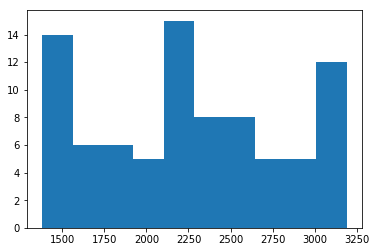

'GDPQ'

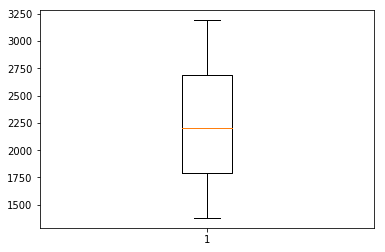

'GDPQ'

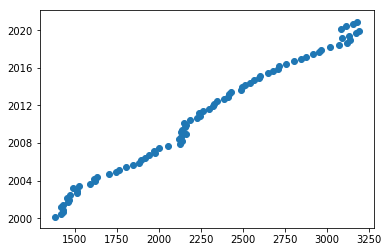

'Statictical Details'

,GDPQ
count,84.000000
mean,2248.413290
std,557.873968
min,1379.900000
25%,1793.950000
50%,2204.800000
75%,2685.650000
max,3189.820283


Normality Test for:  GDPQ
Sample does not look Gaussian. Statistics=0.945, p=0.001


In [11]:
# Analysing data using template function by ploting the series
data_num(qgdp,col_int = 'all',func = 'all',scat = None)

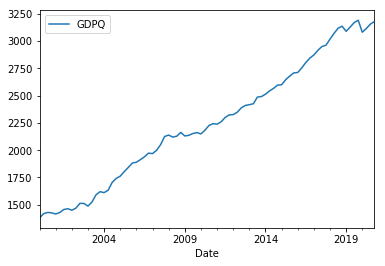

In [12]:
# Ploting GDP data
qgdp.plot(x='Date',y='GDPQ')
plt.show()

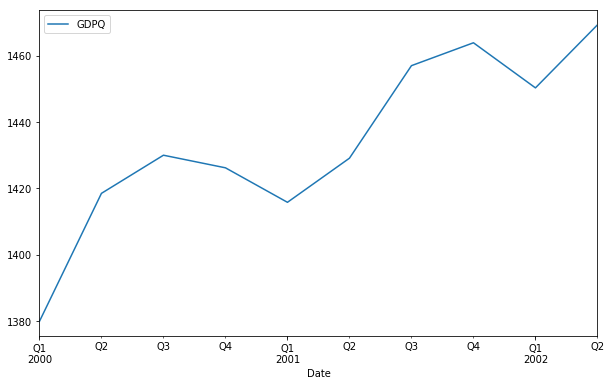

In [13]:
qgdp.iloc[0:10].plot(x='Date',y='GDPQ',figsize=(10,6))
plt.show()

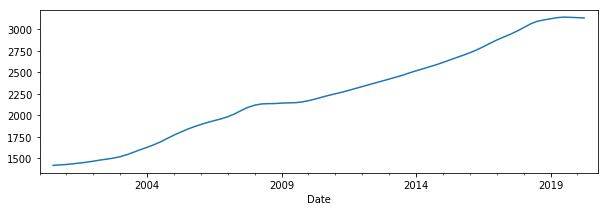

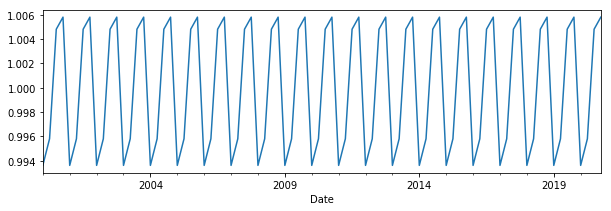

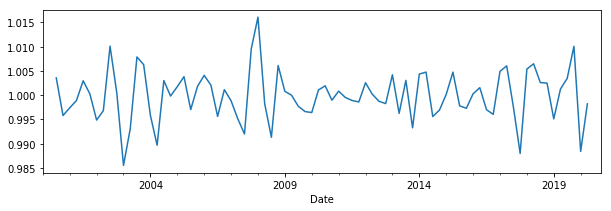

In [13]:
# Decompasing this into seasonal, trend and residual
from statsmodels.tsa.seasonal import seasonal_decompose
qgdp = qgdp.set_index('Date')
result = seasonal_decompose(qgdp, model='multiplicative')
result.trend.plot(figsize=(10,3))
plt.show()
result.seasonal.plot(figsize=(10,3))
plt.show()
result.resid.plot(figsize=(10,3))
plt.show()

**As the above data is  of GDP sereies with obvouis visible trend and seasonality as visible in seasonal decomposition graph so converting it into growth**

In [14]:
# Taking quater on quarter change and multipling by 100 to make it percent
qgdp['GDPG'] = qgdp['GDPQ'].pct_change(periods=4) * 100
qgdp.head(10)

,GDPQ,GDPG
Date,,
2000-03-01,1379.9,NaN
2000-06-01,1418.5,NaN
2000-09-01,1430.0,NaN
2000-12-01,1426.2,NaN
2001-03-01,1415.8,2.601638
2001-06-01,1429.1,0.747268
2001-09-01,1457.0,1.888112
2001-12-01,1463.9,2.643388
2002-03-01,1450.3,2.436785


In [15]:
# Dropping missing value as after claculating growth data first four quater are NA.
qgdp.dropna(inplace=True)
qgdp.head(10)

,GDPQ,GDPG
Date,,
2001-03-01,1415.8,2.601638
2001-06-01,1429.1,0.747268
2001-09-01,1457.0,1.888112
2001-12-01,1463.9,2.643388
2002-03-01,1450.3,2.436785
2002-06-01,1469.3,2.812959
2002-09-01,1513.3,3.864104
2002-12-01,1512.3,3.306237
2003-03-01,1488.2,2.613252


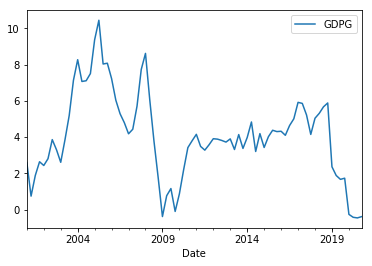

In [17]:
# Ploting GDP growth data
qgdp.plot(y='GDPG')
plt.show()

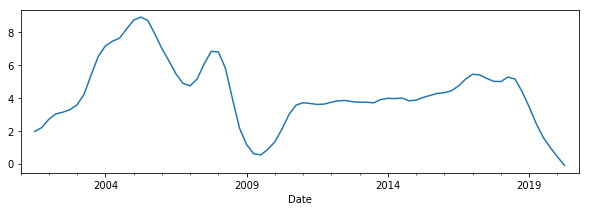

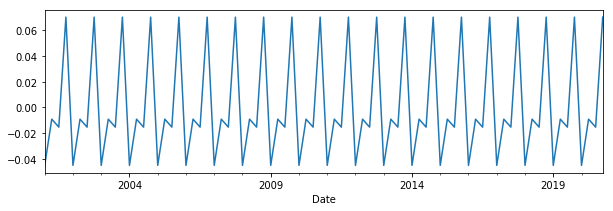

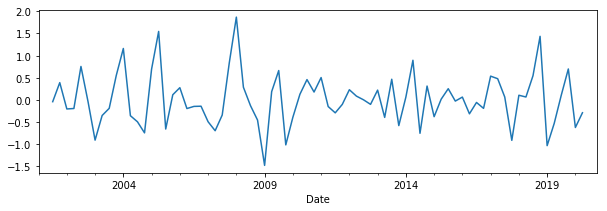

In [18]:
# Decompasing this into seasonal, trend and residual
result = seasonal_decompose(qgdp['GDPG'], model='additive')
result.trend.plot(figsize=(10,3))
plt.show()
result.seasonal.plot(figsize=(10,3))
plt.show()
result.resid.plot(figsize=(10,3))
plt.show()

**No trend in data so we may use it for forecasting, but seasonality which will be catered in the Neural Network**

### Now wrangling through search trends date

In [19]:
gt.head(4)

,date,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,USAID,...,taxes,government,budget,economic growth,subsidy,current account,trade,protest,stock market,revenue
0,2007-01-01,0,25,0,0,0,2,0,0,2,...,9,86,3,3,0,0,58,0,8,15
1,2007-02-01,6,24,0,0,12,5,0,0,7,...,0,79,15,3,0,4,56,0,7,30
2,2007-03-01,0,16,0,0,10,2,0,0,6,...,3,73,29,5,0,0,94,3,6,26
3,2007-04-01,0,11,0,0,11,15,0,0,2,...,5,62,19,8,3,0,76,7,13,23


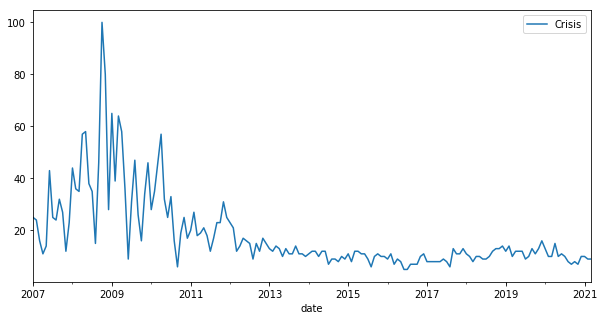

In [20]:
# Ploting GDP data
gt.plot(x='date',y='Crisis',figsize=(10,5))
plt.show()

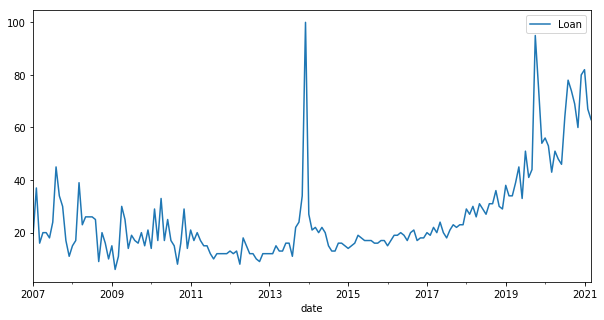

In [21]:
# Ploting GDP data
gt.plot(x='date',y='Loan',figsize=(10,5))
plt.show()

**The intuition behinde using the google trends data for GDP forecasting is that human search behaviour is mostly driven by the underling situtaion as visible in the above graphs that in time of booms people are searching for the loan, and in crices like in 2008 people searching for crisis as so on**

In [16]:
# As this data is monthly frequency but GDP is quaterlyso we have to convert it into quarterly data.
# Making a new data fram with all data quaterley
d = {'Quaters':pd.Series(pd.period_range("1-1-2007","12-1-2020",freq="Q"))}
df = pd.DataFrame(data=d) 
df['GDP'] = qgdp.loc['2007-01-01':'2020-12-01',:]['GDPG'].values

In [11]:
df.head(10)

,Quaters,GDP
0,2007Q1,4.185850
1,2007Q2,4.436896
2,2007Q3,5.707362
3,2007Q4,7.734807
4,2008Q1,8.619464
5,2008Q2,6.079864
6,2008Q3,3.784812
7,2008Q4,1.754881
8,2009Q1,-0.378770
9,2009Q2,0.768904


In [24]:
df.shape

(56, 2)

In [17]:
#Resampling the monthly trends data to quarterly data
gt['date'] = pd.date_range('1/1/2007','3/31/2021', freq='M')
gt['date'] = gt[gt['date'] < '12/31/2020']
gt = gt.set_index('date')
gtq = gt.resample('Q', convention='start',).sum()
gtq

,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,USAID,Credit,...,subsidy,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI
date,,,,,,,,,,,,,,,,,,,,,
2007-03-31,6,65,0,0,22,9,0,0,15,138,...,0,4,208,3,21,71,354.735782,3.451737e+06,2.381693e+06,127.650600
2007-06-30,0,68,0,0,81,28,0,0,21,135,...,7,3,183,19,36,75,335.829153,3.576126e+06,2.586223e+06,129.786836
2007-09-30,0,81,0,0,55,19,2,0,12,226,...,2,3,222,3,31,78,329.672068,3.595995e+06,2.633052e+06,133.781060
2007-12-31,4,62,0,0,75,15,0,0,9,153,...,2,2,186,15,17,38,336.073781,3.886113e+06,2.868583e+06,138.316822
2008-03-31,0,115,8,0,56,18,0,0,13,146,...,2,9,179,4,27,58,386.864363,4.009310e+06,3.268043e+06,143.495849
2008-06-30,0,153,8,8,113,19,0,0,30,167,...,2,8,160,11,24,54,340.515859,4.187887e+06,3.682444e+06,154.895094
2008-09-30,9,96,9,5,103,19,2,0,16,114,...,8,4,171,15,30,54,315.484810,4.377394e+06,4.403803e+06,167.746736
2008-12-31,39,208,30,76,125,7,4,0,14,143,...,2,3,172,14,34,52,317.679730,4.345154e+06,4.736979e+06,171.460813
2009-03-31,32,168,60,42,90,20,2,0,9,121,...,0,0,187,12,26,55,355.643290,4.339386e+06,4.916189e+06,173.197647


In [18]:
# Merging this trends data to newly created dataframe.
for (columnName, columnData) in gtq.iteritems():
    df[columnName] = columnData.values

In [19]:
df.head(10)

,Quaters,GDP,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,...,subsidy,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI
0,2007Q1,4.185850,6,65,0,0,22,9,0,0,...,0,4,208,3,21,71,354.735782,3.451737e+06,2.381693e+06,127.650600
1,2007Q2,4.436896,0,68,0,0,81,28,0,0,...,7,3,183,19,36,75,335.829153,3.576126e+06,2.586223e+06,129.786836
2,2007Q3,5.707362,0,81,0,0,55,19,2,0,...,2,3,222,3,31,78,329.672068,3.595995e+06,2.633052e+06,133.781060
3,2007Q4,7.734807,4,62,0,0,75,15,0,0,...,2,2,186,15,17,38,336.073781,3.886113e+06,2.868583e+06,138.316822
4,2008Q1,8.619464,0,115,8,0,56,18,0,0,...,2,9,179,4,27,58,386.864363,4.009310e+06,3.268043e+06,143.495849
5,2008Q2,6.079864,0,153,8,8,113,19,0,0,...,2,8,160,11,24,54,340.515859,4.187887e+06,3.682444e+06,154.895094
6,2008Q3,3.784812,9,96,9,5,103,19,2,0,...,8,4,171,15,30,54,315.484810,4.377394e+06,4.403803e+06,167.746736
7,2008Q4,1.754881,39,208,30,76,125,7,4,0,...,2,3,172,14,34,52,317.679730,4.345154e+06,4.736979e+06,171.460813
8,2009Q1,-0.378770,32,168,60,42,90,20,2,0,...,0,0,187,12,26,55,355.643290,4.339386e+06,4.916189e+06,173.197647
9,2009Q2,0.768904,13,103,31,26,111,14,4,0,...,2,3,182,9,36,52,321.245046,4.465184e+06,4.970916e+06,176.587907


**Data frame is ready for furthe processing and training**

In [20]:
df_details(df,5)

Data Types of Column: 
 Quaters             period[Q-DEC]
GDP                       float64
Economic crisis             int64
Crisis                      int64
Recession                   int64
Financial crisis            int64
Inflation                   int64
Unemployment                int64
BISP                        int64
ehsaas program              int64
USAID                       int64
Credit                      int64
Loan                        int64
Interest                    int64
House Loan                  int64
Car Loan                    int64
Food                        int64
Cinema                      int64
Cars                        int64
Birthday                    int64
Travel                      int64
Weddings                    int64
Fitness                     int64
Cigarette                   int64
Tourism                     int64
Hotels                      int64
Fast Food                   int64
House for sale              int64
Construction            

,Quaters,GDP,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,...,subsidy,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI
0,2007Q1,4.185850,6,65,0,0,22,9,0,0,...,0,4,208,3,21,71,354.735782,3.451737e+06,2.381693e+06,127.650600
1,2007Q2,4.436896,0,68,0,0,81,28,0,0,...,7,3,183,19,36,75,335.829153,3.576126e+06,2.586223e+06,129.786836
2,2007Q3,5.707362,0,81,0,0,55,19,2,0,...,2,3,222,3,31,78,329.672068,3.595995e+06,2.633052e+06,133.781060
3,2007Q4,7.734807,4,62,0,0,75,15,0,0,...,2,2,186,15,17,38,336.073781,3.886113e+06,2.868583e+06,138.316822
4,2008Q1,8.619464,0,115,8,0,56,18,0,0,...,2,9,179,4,27,58,386.864363,4.009310e+06,3.268043e+06,143.495849
51,2019Q4,1.736338,2,40,5,2,27,7,6,5,...,3,9,67,12,24,33,414.446036,1.967250e+07,3.561612e+07,391.370000
52,2020Q1,-0.258280,2,33,5,3,26,6,10,7,...,3,6,61,6,28,29,446.819825,2.017608e+07,3.597881e+07,395.580000
53,2020Q2,-0.419317,2,36,9,3,20,6,19,153,...,7,7,58,7,22,24,310.019496,2.250828e+07,3.978616e+07,393.480000
54,2020Q3,-0.454332,1,25,5,1,21,6,9,62,...,5,7,65,5,19,31,399.937677,2.294665e+07,4.026567e+07,408.080000
55,2020Q4,-0.383455,0,15,4,2,20,5,6,15,...,3,4,50,6,13,24,292.680000,1.497321e+07,2.699926e+07,279.430000


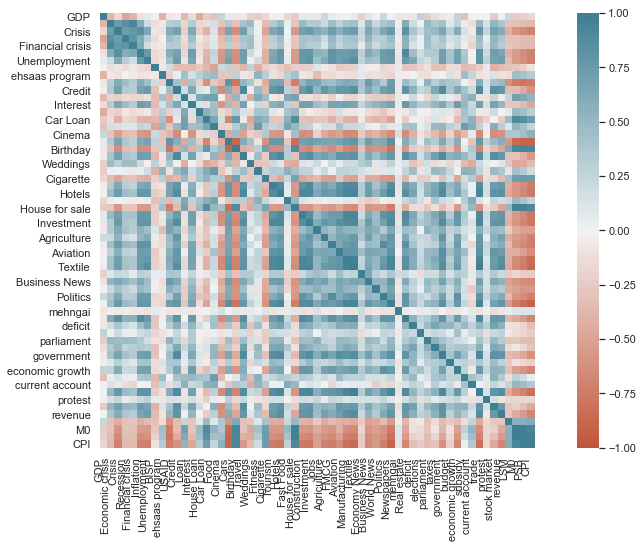

In [21]:
# Ploting correlation heat map to see the relation between the data in trend values with trends data
corr_hmap(df)

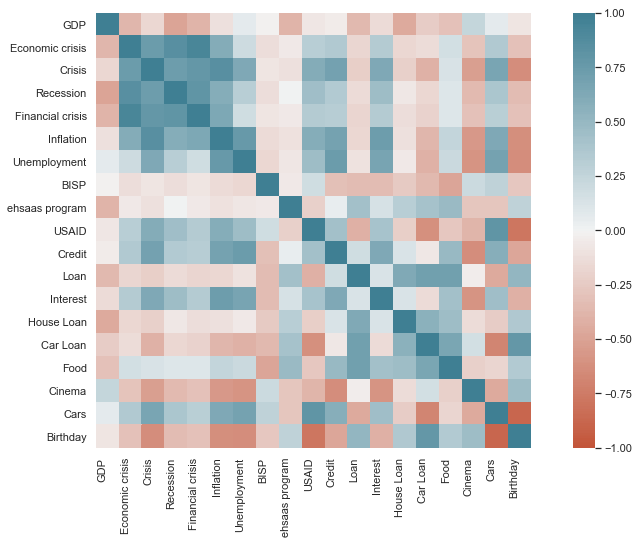

In [187]:
corr_hmap(df.iloc[:,:20])

Feature 0: nan
Feature 1: nan
Feature 2: nan
Feature 3: nan
Feature 4: nan
Feature 5: nan
Feature 6: nan
Feature 7: nan
Feature 8: nan
Feature 9: nan
Feature 10: nan
Feature 11: nan
Feature 12: nan
Feature 13: nan
Feature 14: nan
Feature 15: nan
Feature 16: nan
Feature 17: nan
Feature 18: nan
Feature 19: nan
Feature 20: nan
Feature 21: nan
Feature 22: nan
Feature 23: nan
Feature 24: nan
Feature 25: nan
Feature 26: nan
Feature 27: nan
Feature 28: nan
Feature 29: nan
Feature 30: nan
Feature 31: nan
Feature 32: nan
Feature 33: nan
Feature 34: nan
Feature 35: nan
Feature 36: nan
Feature 37: nan
Feature 38: nan
Feature 39: nan
Feature 40: nan
Feature 41: nan
Feature 42: nan
Feature 43: nan
Feature 44: nan
Feature 45: nan
Feature 46: nan
Feature 47: nan
Feature 48: nan
Feature 49: nan
Feature 50: nan
Feature 51: nan
Feature 52: nan
Feature 53: nan


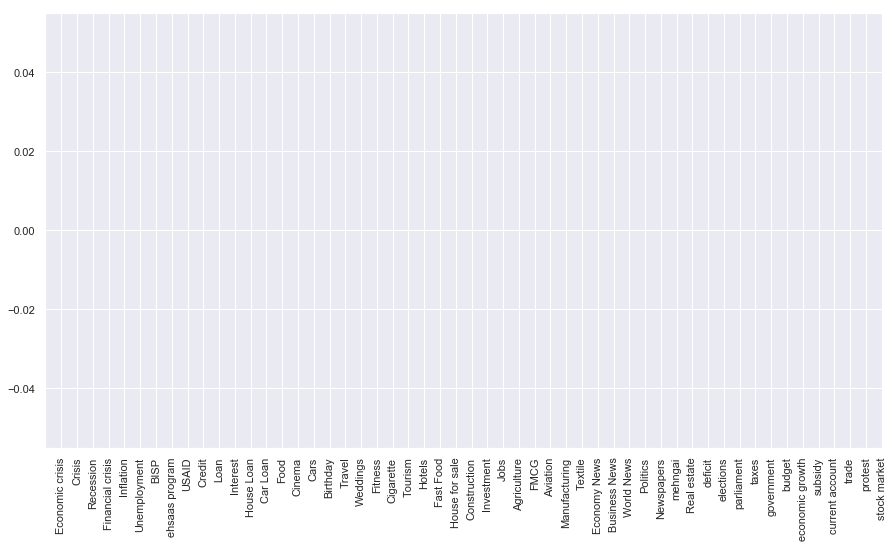

In [30]:
x_fs,y,fs = feature_selectk(df.iloc[:,1:],54,'GDP')
# Displaying the fcore of calculating for each varible
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.xticks(range(1,len(fs.scores_)),df.iloc[:,2:len(df)-1].columns,rotation=90)
plt.show()

In [22]:
x = df.iloc[:,2:]
y = df['GDP']
a = feature_select_rffs(x,y,reg=True).values
a

array(['Economic crisis', 'Recession', 'Financial crisis', 'BISP',
       'ehsaas program', 'USAID', 'Credit', 'Loan', 'House Loan',
       'Car Loan', 'Food', 'Cinema', 'Cigarette', 'Agriculture',
       'Newspapers', 'deficit', 'subsidy'], dtype=object)

In [32]:
df.Quaters=df.Quaters.astype(str)

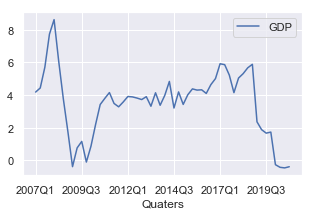

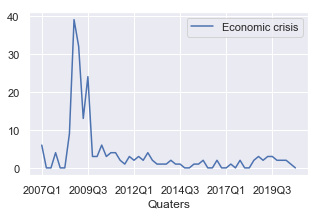

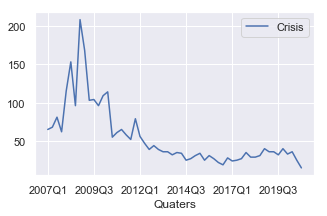

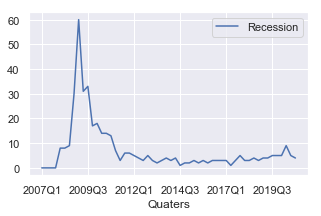

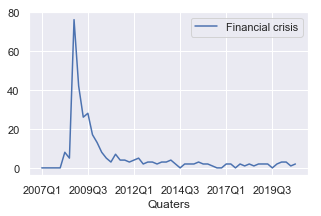

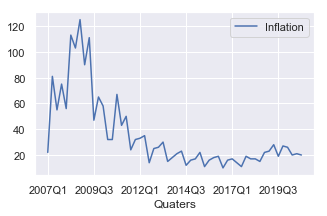

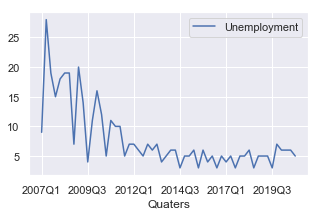

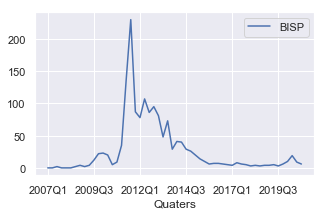

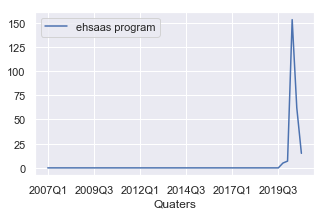

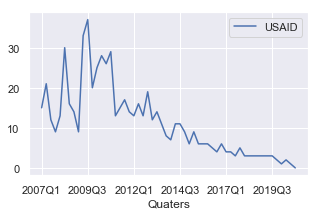

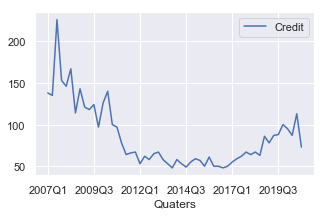

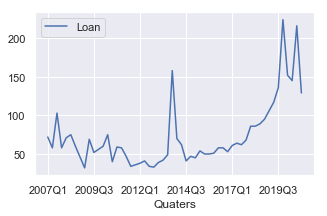

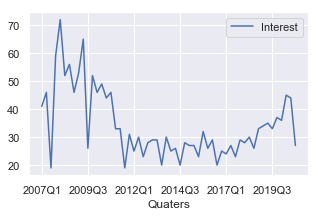

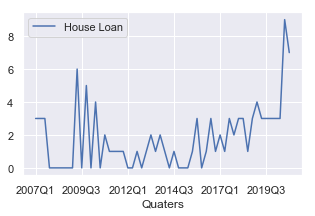

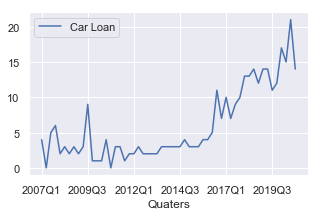

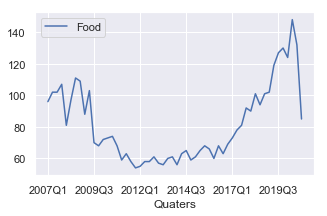

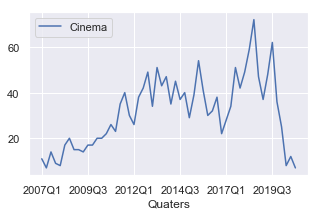

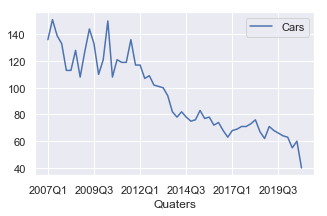

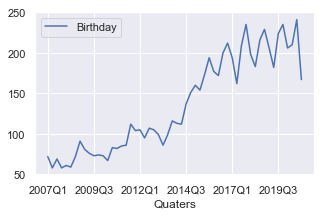

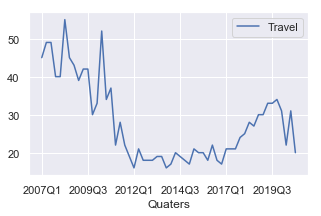

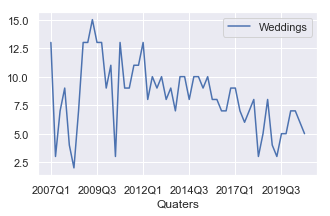

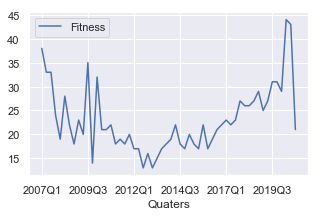

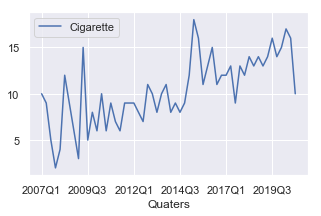

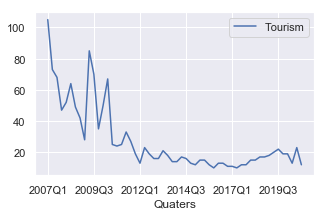

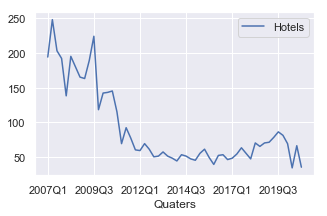

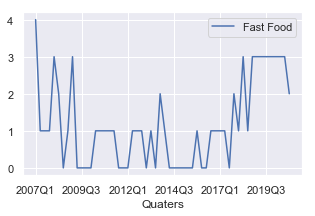

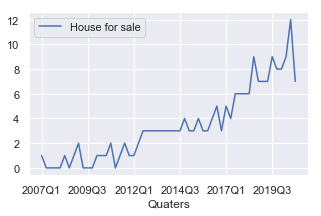

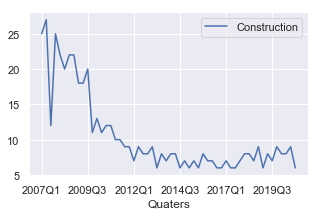

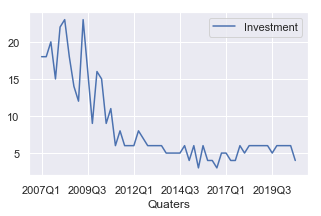

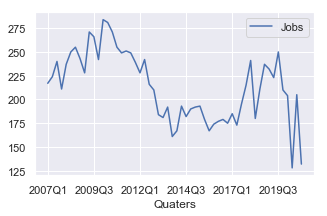

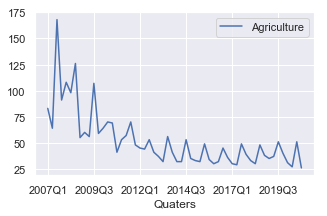

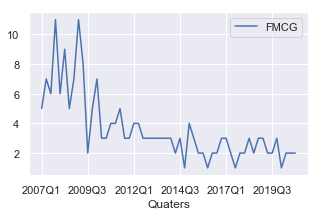

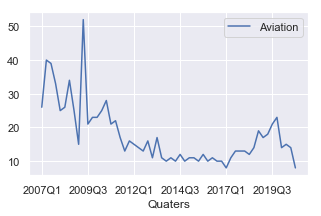

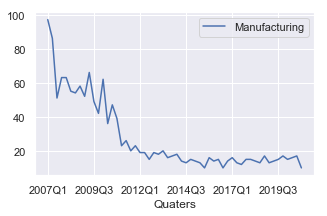

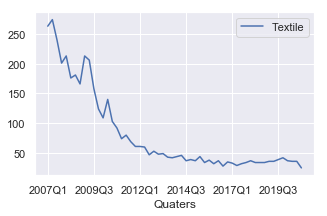

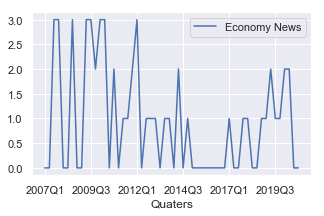

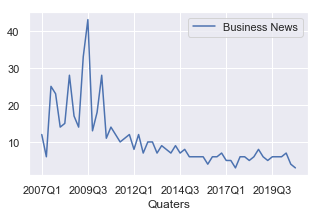

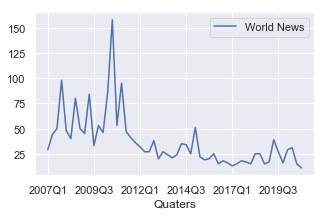

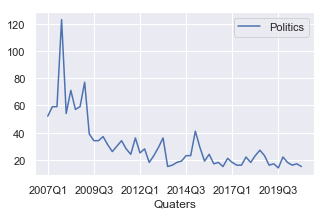

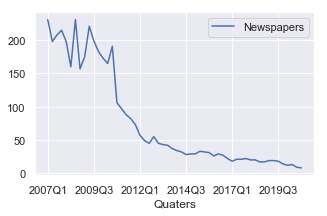

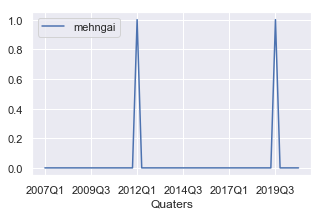

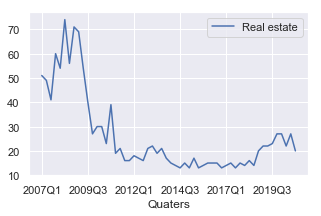

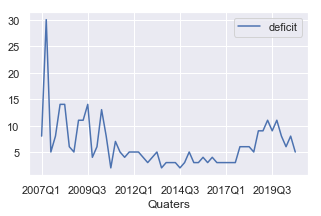

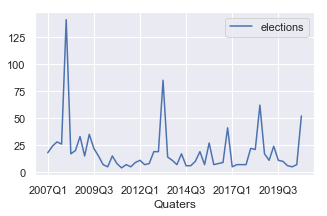

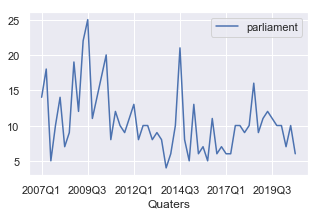

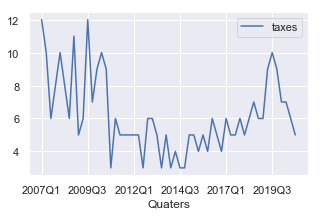

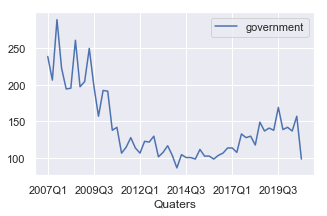

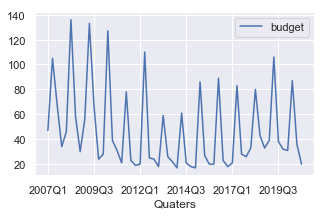

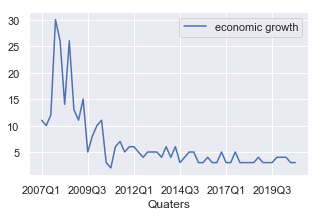

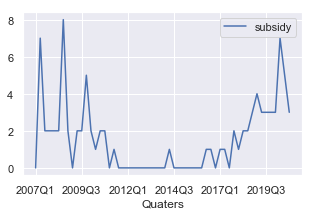

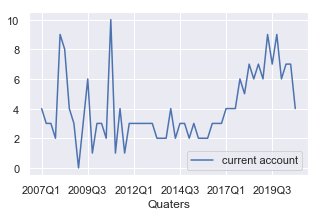

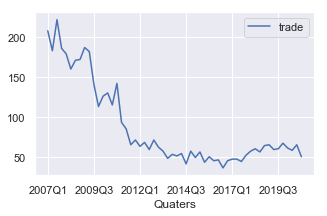

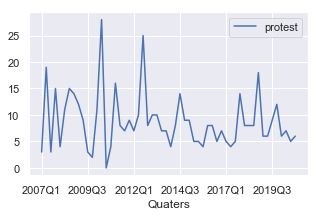

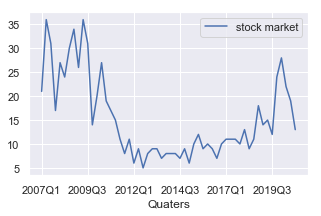

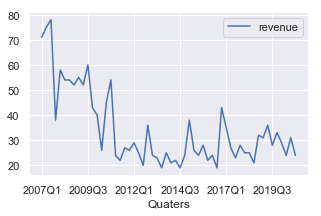

In [33]:
# Line plots of all features
for (columnName, columnData) in df.iloc[:,1:].iteritems():
    df.plot(x = 'Quaters',y=columnName,figsize=(5,3))
    plt.show()

# Training using Multi Layer Preceptron
### Now training trends data on the available GDP data for prediction using the trained model.

In [15]:
# import related libraries
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import math 
from pandas import DataFrame
from pandas import concat
from numpy import concatenate

Using TensorFlow backend.


In [100]:
df1 = df.pop('GDP')
df['GDP'] = df1
df.head(5)

,Quaters,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,USAID,...,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI,GDP
0,2007Q1,6,65,0,0,22,9,0,0,15,...,4,208,3,21,71,354.735782,3.451737e+06,2.381693e+06,127.650600,4.185850
1,2007Q2,0,68,0,0,81,28,0,0,21,...,3,183,19,36,75,335.829153,3.576126e+06,2.586223e+06,129.786836,4.436896
2,2007Q3,0,81,0,0,55,19,2,0,12,...,3,222,3,31,78,329.672068,3.595995e+06,2.633052e+06,133.781060,5.707362
3,2007Q4,4,62,0,0,75,15,0,0,9,...,2,186,15,17,38,336.073781,3.886113e+06,2.868583e+06,138.316822,7.734807
4,2008Q1,0,115,8,0,56,18,0,0,13,...,9,179,4,27,58,386.864363,4.009310e+06,3.268043e+06,143.495849,8.619464


In [101]:
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df.iloc[:,1:])
scaled

array([[0.15384615, 0.25906736, 0.        , ..., 0.        , 0.        ,
        0.51138265],
       [0.        , 0.2746114 , 0.        , ..., 0.00539886, 0.00761773,
        0.53904981],
       [0.        , 0.34196891, 0.        , ..., 0.00663499, 0.02186097,
        0.67906471],
       ...,
       [0.05128205, 0.10880829, 0.15      , ..., 0.9873426 , 0.94793699,
        0.00385891],
       [0.02564103, 0.05181347, 0.08333333, ..., 1.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.64981478, 0.54123926,
        0.00781116]])

In [102]:
scal = pd.DataFrame(scaled, columns = df.iloc[:,1:].columns)
scal.head(5)

,Economic crisis,Crisis,Recession,Financial crisis,Inflation,Unemployment,BISP,ehsaas program,USAID,Credit,...,current account,trade,protest,stock market,revenue,LSM,M0,PSB,CPI,GDP
0,0.153846,0.259067,0.000000,0.0,0.104348,0.24,0.000000,0.0,0.405405,0.505618,...,0.4,0.924731,0.107143,0.516129,0.881356,0.285544,0.000000,0.000000,0.000000,0.511383
1,0.000000,0.274611,0.000000,0.0,0.617391,1.00,0.000000,0.0,0.567568,0.488764,...,0.3,0.790323,0.678571,1.000000,0.949153,0.198547,0.006381,0.005399,0.007618,0.539050
2,0.000000,0.341969,0.000000,0.0,0.391304,0.64,0.008696,0.0,0.324324,1.000000,...,0.3,1.000000,0.107143,0.838710,1.000000,0.170215,0.007400,0.006635,0.021861,0.679065
3,0.102564,0.243523,0.000000,0.0,0.565217,0.48,0.000000,0.0,0.243243,0.589888,...,0.2,0.806452,0.535714,0.387097,0.322034,0.199672,0.022282,0.012852,0.038035,0.902504
4,0.000000,0.518135,0.133333,0.0,0.400000,0.60,0.000000,0.0,0.351351,0.550562,...,0.9,0.768817,0.142857,0.709677,0.661017,0.433380,0.028601,0.023396,0.056504,1.000000


In [103]:
values = scal.values
train = values[:-12, :]
test = values[-12:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(44, 1, 58) (44,) (12, 1, 58) (12,)


Train on 44 samples, validate on 12 samples
Epoch 1/10
 - 1s - loss: 0.2488 - val_loss: 0.5462
Epoch 2/10
 - 0s - loss: 0.3596 - val_loss: 0.3120
Epoch 3/10
 - 0s - loss: 0.1700 - val_loss: 0.2731
Epoch 4/10
 - 0s - loss: 0.1270 - val_loss: 0.3453
Epoch 5/10
 - 0s - loss: 0.1308 - val_loss: 0.3012
Epoch 6/10
 - 0s - loss: 0.1348 - val_loss: 0.3331
Epoch 7/10
 - 0s - loss: 0.1258 - val_loss: 0.3285
Epoch 8/10
 - 0s - loss: 0.1203 - val_loss: 0.3124
Epoch 9/10
 - 0s - loss: 0.1033 - val_loss: 0.3079
Epoch 10/10
 - 0s - loss: 0.0919 - val_loss: 0.3150


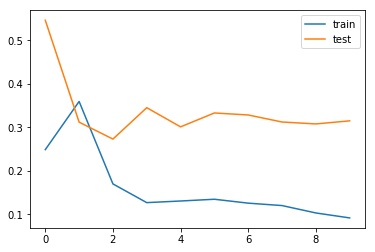

In [104]:
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(300))
model.add(Dense(10))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=6, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [105]:
#make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))
# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, :]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, :]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = math.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 14.634


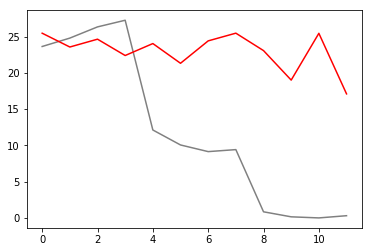

In [106]:
#Ploting Fitted and Actual values
plt.plot(inv_y,color="gray")
plt.plot(inv_yhat,color="red")
plt.show()

In [35]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
X_train, X_test, y_train, y_test = df.iloc[:51,2:],df.iloc[52:,2:],df.iloc[:51,1],df.iloc[52:,1]

network = MLPRegressor(hidden_layer_sizes=(300, 10),
                       solver = "adam",
                       activation = "relu",
                       learning_rate_init = 0.001,
                       tol=1e-4,
                       max_iter=700000,
                       early_stopping = False,
                       random_state=0)
network.fit(X_train, y_train)
network.predict(X_test)


array([2.41256983, 2.58384271, 0.25254688, 1.69471641])

**As Data size is not large so MLP is not performing wel lets try other technique**

## Applying All  Machine Learning Algorithms from Template

In [32]:
## Changing Class balance and checking resuts
all_algo = ['decisiontree','randomforest','knn','lreg','svm', 'gboost','adaboost']
#all_algo = ['decisiontree']
colum = ['GDP']
X_train, X_test, y_train, y_test = df.iloc[:-4,2:],df.iloc[-4:,2:],df.iloc[:-4,1],df.iloc[-4:,1]
for alg in all_algo:
    mae,mse,r2,r2adj,model = ml_algo(X_train, X_test, y_train, y_test,algo = alg,task = 'Reg',n=3)
    print(alg)
    print("Mean Absolute Error: ",mae)
    print("Mean Square Error :",mse)
    print("Rbarsquare: ",r2)
    print("Rbarsquare Adjusted: ",r2adj)
    print()

decisiontree
Mean Absolute Error:  4.351181697155505
Mean Square Error : 19.38532637173128
Rbarsquare:  -3540.7720958125064
Rbarsquare Adjusted:  -3540.772095812506

randomforest
Mean Absolute Error:  3.442877146211465
Mean Square Error : 14.193509574291022
Rbarsquare:  -2592.2076245658805
Rbarsquare Adjusted:  -2592.2076245658805

knn
Mean Absolute Error:  2.9112758047130054
Mean Square Error : 10.256509385539346
Rbarsquare:  -1872.9028709423826
Rbarsquare Adjusted:  -1872.9028709423828

lreg
Mean Absolute Error:  5.403826103530117
Mean Square Error : 35.17371968946646
Rbarsquare:  -6425.370983557364
Rbarsquare Adjusted:  -6425.3709835573645

svm
Mean Absolute Error:  4.198142329562928
Mean Square Error : 17.84115903566346
Rbarsquare:  -3258.6469111612196
Rbarsquare Adjusted:  -3258.6469111612196

gboost
Mean Absolute Error:  3.628727740984974
Mean Square Error : 13.960304262951635
Rbarsquare:  -2549.6001363833975
Rbarsquare Adjusted:  -2549.6001363833975

adaboost
Mean Absolute Error